In [52]:
import tweepy
import csv
import time
import html.parser as hp
import pandas as pd
import nltk
import pickle
import numpy as np
import gensim
import re  # regular expressions (for playing with the text)
from gensim.parsing.preprocessing import STOPWORDS # common english "stop words" -- a, the, etc.
from gensim.parsing import PorterStemmer
from gensim import corpora, models
import nltk.data
import nltk

from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import spacy

from nltk.tokenize import RegexpTokenizer
from gensim import corpora, models
import gensim
import os
from os import path
from time import sleep
import matplotlib.pyplot as plt
import random
import wordcloud
from wordcloud import WordCloud , STOPWORDS


In [23]:
import re

In [24]:
with open("sample_investment strategies.txt", "r") as ins:
    array = []
    for line in ins:
        array.append(line)
        
res = "".join(array)
doc = re.sub('\t','',res)
doc_lowers = [doc.lower() for doc in array]
import string
doc_no_punctuation = [doc.translate(str.maketrans('','',string.punctuation)) for doc in doc_lowers]
doc_tokens = [nltk.word_tokenize(doc) for doc in doc_no_punctuation]

In [25]:
doc_no_punctuation1 = [re.sub('\t','',doc1) for doc1 in doc_no_punctuation]
#doc_no_punctuation1

In [26]:
import nltk
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

lemma = nltk.WordNetLemmatizer()
#text = "ladies in technology are amazing at coding sales"
for i in range(0,len(doc_no_punctuation)):
    lemmas=''
    ex = [i.lower() for i in (doc_no_punctuation[i]).split()]
    lemmas = ' '.join(lemma.lemmatize(i) for i in ex if not i in stopwords.words("english"))
    doc_no_punctuation[i] = lemmas


In [27]:
doc_tokens = [nltk.word_tokenize(doc) for doc in doc_no_punctuation]
#print(doc_tokens[0:1000])

In [46]:
dictionary = gensim.corpora.Dictionary(doc_tokens )

In [47]:
dictionary.filter_extremes(no_above=0.5,keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in doc_tokens ]

In [48]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break


[]


In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [50]:
topics=lda_model.print_topics(num_topics=10, num_words=6)

0


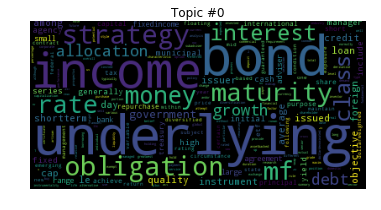

1


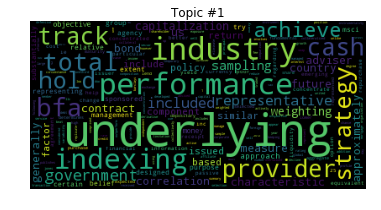

2


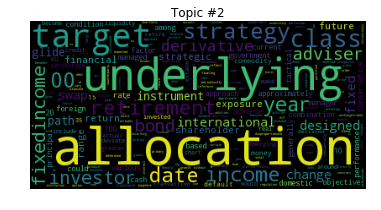

3


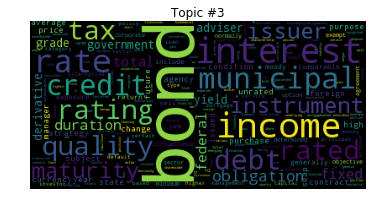

4


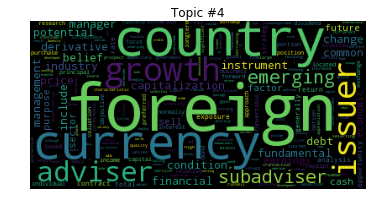

5


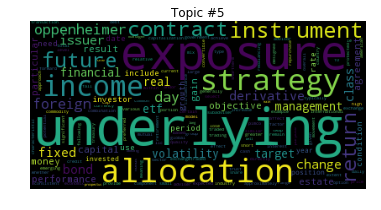

6


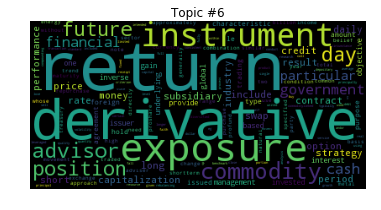

7


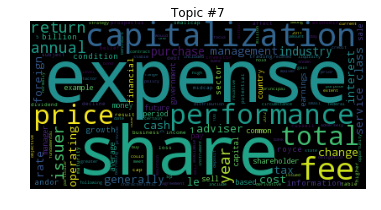

8


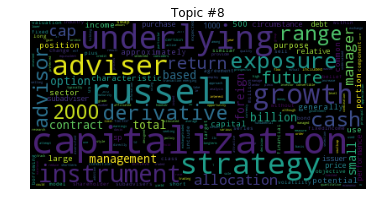

9


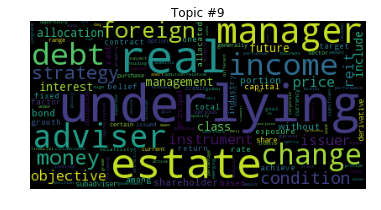

In [53]:
for t in range(lda_model.num_topics):
    plt.figure()
    print(t)
    plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()


In [29]:
doc_tokens1= [item for sublist in doc_tokens for item in sublist]

In [30]:
doc_toks = doc_tokens1[:100000]

In [31]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=1,                        
                             stop_words='english',            
                             lowercase=True,                   
                             token_pattern='[a-zA-Z0-9]{3,}',      
                            )

data_vectorized = vectorizer.fit_transform(doc_toks)

In [21]:
data_vectorized

<100000x4704 sparse matrix of type '<class 'numpy.int64'>'
	with 91113 stored elements in Compressed Sparse Row format>

In [32]:
lda_model = LatentDirichletAllocation(n_topics= 15 ,                             
                                      random_state=100,         
                                      batch_size=128)
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)

/usr/lib64/python3.4/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/usr/lib64/python3.4/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1, n_topics=15,
             perp_tol=0.1, random_state=100, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)


In [35]:
print("Log Likelihood: ", lda_model.score(data_vectorized))

print("Perplexity: ", lda_model.perplexity(data_vectorized))

print(lda_model.get_params())

Log Likelihood:  -615103.0053108797
Perplexity:  862.4864055603279
{'max_doc_update_iter': 100, 'learning_offset': 10.0, 'n_components': 10, 'batch_size': 128, 'verbose': 0, 'total_samples': 1000000.0, 'evaluate_every': -1, 'topic_word_prior': None, 'n_topics': 15, 'mean_change_tol': 0.001, 'max_iter': 10, 'doc_topic_prior': None, 'n_jobs': 1, 'learning_decay': 0.7, 'learning_method': None, 'perp_tol': 0.1, 'random_state': 100}


In [ ]:
search_params = {'n_components': [10, 15], 'learning_decay': [.5, .7]}

lda = LatentDirichletAllocation()

model = GridSearchCV(lda, param_grid=search_params)

model.fit(data_vectorized)

In [37]:
best_lda_model = model.best_estimator_

print("Best Model's Params: ", model.best_params_)

print("Best Log Likelihood Score: ", model.best_score_)

print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'n_components': 10, 'learning_decay': 0.7}
Best Log Likelihood Score:  -229680.070598324
Model Perplexity:  841.8018938954601


/usr/lib64/python3.4/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/usr/lib64/python3.4/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/usr/lib64/python3.4/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


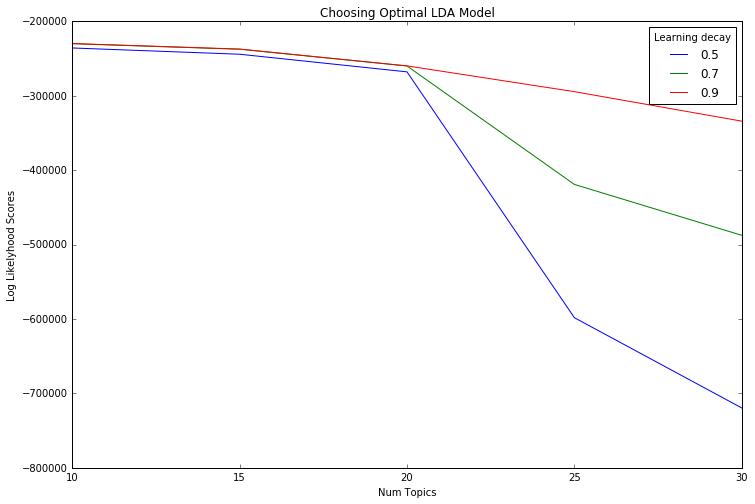

In [26]:
n_topics = [10, 15, 20, 25, 30]
log_likelyhoods_5 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.5]
log_likelyhoods_7 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.7]
log_likelyhoods_9 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.9]

plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [30]:
lda_output = lda_model.transform(data_vectorized)

topicnames = ["Topic" + str(i) for i in range(lda_model.n_topics)]

docnames = ["Doc" + str(i) for i in range(len(doc_toks))]

df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

In [41]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

Topic Num  Num Documents
0           0          15389
1           9           6504
2           6           6428
3          14           6381
4          13           6262
5          12           6139
6           1           6104
7           7           5902
8           5           5899
9           8           5897
10          3           5885
11          2           5877
12         11           5805
13         10           5789
14          4           5739

In [32]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
2      10.209465        1       1  107.035873  429.221161
4      10.183673        1       2  -60.539173 -116.035103
8      10.091480        1       3  345.051422  207.028839
0      10.087090        1       4 -149.423019 -404.018402
5      10.018494        1       5  172.330383 -354.104309
9       9.909837        1       6  268.105499  -76.437859
6       9.904898        1       7   18.618881  141.094681
7       9.875265        1       8 -309.818909  101.427200
1       9.867582        1       9 -214.651550  379.180054
3       9.852216        1      10 -387.312836 -181.769653, topic_info=     Category         Freq            Term        Total  loglift  logprob
term                                                                     
2117  Default  4573.000000            fund  4573.000000  30.0000  30.0000
3903  Default  2760.000000        security  2760.000000  29.0000  29.0000
2542  Default  2038.000000      investment  2038.000000  28.0000  28.0000
2410  Default  1758.000000           index  1758.000000  27.0000  27.0000
865   Default  1479.000000           asset  1479.000000  26.0000  26.0000
2805  Default  1464.000000          market  1464.000000  25.0000  25.0000
3338  Default  1340.000000       portfolio  1340.000000  24.0000  24.0000
1245  Default  1232.000000         company  1232.000000  23.0000  23.0000
2536  Default  1000.000000          invest  1000.000000  22.0000  22.0000
4103  Default   796.000000           stock   796.000000  21.0000  21.0000
1818  Default   739.000000          equity   739.000000  20.0000  20.0000
4462  Default   675.000000      underlying   675.000000  19.0000  19.0000
4567  Default   538.000000           value   538.000000  18.0000  18.0000
755   Default   508.000000      allocation   508.000000  17.0000  17.0000
2381  Default   506.000000       including   506.000000  16.0000  16.0000
3819  Default   501.000000            risk   501.000000  15.0000  15.0000
2551  Default   491.000000         invests   491.000000  14.0000  14.0000
4118  Default   491.000000        strategy   491.000000  13.0000  13.0000
4343  Default   484.000000            time   484.000000  12.0000  12.0000
1020  Default   483.000000            bond   483.000000  11.0000  11.0000
2383  Default   459.000000          income   459.000000  10.0000  10.0000
702   Default   458.000000         adviser   458.000000   9.0000   9.0000
3787  Default   416.000000          return   416.000000   8.0000   8.0000
1549  Default   401.000000      derivative   401.000000   7.0000   7.0000
2486  Default   402.000000      instrument   402.000000   6.0000   6.0000
1947  Default   401.000000        exposure   401.000000   5.0000   5.0000
3906  Default   365.000000            seek   365.000000   4.0000   4.0000
1095  Default   365.000000  capitalization   365.000000   3.0000   3.0000
2575  Default   344.000000          issuer   344.000000   2.0000   2.0000
2074  Default   341.000000         foreign   341.000000   1.0000   1.0000
...       ...          ...             ...          ...      ...      ...
4370  Topic10   302.552342           total   303.406895   2.3147  -3.3901
2140  Topic10   296.176991          future   297.032222   2.3146  -3.4114
3273  Topic10   280.691306     performance   281.546597   2.3144  -3.4651
2376  Topic10   260.165341         include   261.019890   2.3142  -3.5411
1365  Topic10   230.774815        contract   231.629363   2.3138  -3.6609
1760  Topic10   227.123564        emerging   227.978113   2.3137  -3.6769
3523  Topic10   201.660771         purpose   202.515320   2.3132  -3.7958
1154  Topic10   159.635972  characteristic   160.490523   2.3121  -4.0295
3498  Topic10   158.127773         provide   158.982323   2.3121  -4.0390
913   Topic10   146.457154         average   147.311706   2.3117  -4.1156
1140  Topic10   132.048239         certain   132.902793   2.3110  -4.2192
3940 

In [40]:
df_topic_keywords = pd.DataFrame(lda_model.components_)
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames
df_topic_keywords.head()

000       001  0026sp0512       004       005       008  \
Topic0  0.066667  0.066667    0.066667  0.066667  0.066667  0.066667   
Topic1  0.066667  0.066667    0.066667  0.066667  0.066667  0.066667   
Topic2  0.066667  0.066667    0.066667  0.066667  0.066667  0.066667   
Topic3  0.066667  0.066667    0.066667  0.066667  0.066667  0.066667   
Topic4  0.066667  0.066667    0.066667  0.066667  0.066667  0.066667   

             009       010       014       015    ...        yield  yielding  \
Topic0  0.066667  0.066667  0.066667  0.066667    ...     0.066667  0.066667   
Topic1  0.066667  0.066667  0.066667  0.066667    ...     0.066667  0.066667   
Topic2  0.627133  0.066667  0.066667  0.066667    ...     0.066667  0.066667   
Topic3  0.066667  0.066667  0.066667  0.066667    ...     0.066667  0.066667   
Topic4  0.066667  2.451808  0.066667  0.066667    ...     0.066667  2.246300   

        yieldtomaturity      york  yourcost   zealand     zebra      zero  \
Topic0         0.066667  0.066667  0.066667  0.066667  0.066667  0.066667   
Topic1         0.066667  0.066667  2.166476  0.066667  0.066667  0.066667   
Topic2         0.066667  0.066667  0.066667  0.066667  0.066667  0.066667   
Topic3         0.066667  0.066667  0.066667  0.066667  0.066667  0.066667   
Topic4         0.066667  0.066667  0.066667  0.066667  0.066667  0.066667   

        zerocoupon      zinc  
Topic0    0.066667  0.066667  
Topic1    0.066667  0.066667  
Topic2    0.066667  0.066667  
Topic3    0.066667  1.374333  
Topic4    0.066667  0.066667  

[5 rows x 4704 columns]

In [40]:
dictionary = gensim.corpora.Dictionary(doc_tokens)

In [41]:
doc_tokens1= [item for sublist in doc_tokens for item in sublist]

In [ ]:
from collections import Counter
counts = Counter(doc_tokens1)
print(counts)

In [235]:
import csv    
with open('word_freq.csv', 'w+') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for key, count in reversed(counts.most_common()):
        writer.writerow([key,count])

In [223]:
outfile = "frequency_count.csv"

with open(outfile, encoding='utf-8-sig', mode='w') as fp:
    fp.write('word freq\n')  
    for tag, count in counts.items():
        fp.write('{},{}\n'.format(tag, count)) 

In [ ]:
print(trigram_phraser2[bigram_phraser2[doc_stemmed] ])
csvfile = "C:/Users/vineela/Downloads/b.csv"

#Assuming res is a flat list
with open(csvfile, "w+") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in trigram_phraser2[bigram_phraser2[doc_stemmed]]:
        writer.writerow([val])

In [205]:
print(dictionary)

Dictionary(4741 unique tokens: ['offer', 'deposit', 'municipal', 'reserved', 'fashion']...)


In [ ]:
d_view = [ (k,v) for k,v in dictionary.iteritems() ]
d_view.sort(reverse=True) # natively sort tuples by first element
for v,k in d_view:
    print("%s: %d" % (k,v))

In [189]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count >1000000:
        break

1742 offer
469 deposit
812 municipal
2590 reserved
4311 fashion
4705 classallocationmarket
3775 facilitates
694 improving
4081 boston
1426 solid
2223 dominance
2242 160
2510 shorten
1913 reached
1433 33
4404 auditing
3378 pro
89 formula
3659 mind
2268 depicted
1276 singapore
572 seeking
1827 shorter
4334 subsectors
2800 depository
3988 arrangement
4455 reliance
3515 7095
3698 permit
4572 transferable
4276 november30
4386 freefloat
1865 complementary
2911 longerterm
3640 contributes
3257 critical
4441 impossible
2042 valueof
3645 disease
3924 fundsummary
1523 annually
943 median
979 exclusively
2930 projection
1548 removed
3491 norm
2285 comparably
3017 reasonably
523 lose
547 possibly
3651 expropriation
761 kingdom
696 llc
1079 fee
3751 question
3834 manufacturing
2350 benefitting
1437 34
1880 magnify
4534 absence
1713 chile
2761 variation
3669 setting
2437 mitigate
4015 away
4364 acute
3767 syndicated
122 junk
3532 education
1591 occasion
3569 entirety
2897 exactly
480 engaging
2811 p

In [42]:
dictionary.filter_extremes(no_above=0.5,keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in doc_tokens]

In [43]:
bow_corpus

[[],
 [(0, 1),
  (1, 1),
  (2, 1),
  (3, 2),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 2),
  (12, 3),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 3),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 5),
  (29, 1),
  (30, 3),
  (31, 1),
  (32, 2),
  (33, 1),
  (34, 1),
  (35, 3),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 6),
  (41, 3),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 3),
  (47, 2),
  (48, 2),
  (49, 1),
  (50, 1),
  (51, 4),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 4),
  (57, 3),
  (58, 2),
  (59, 1),
  (60, 2),
  (61, 2),
  (62, 1),
  (63, 1),
  (64, 4),
  (65, 1),
  (66, 2),
  (67, 3),
  (68, 1),
  (69, 3),
  (70, 1),
  (71, 1),
  (72, 2),
  (73, 2),
  (74, 2),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 3),
  (79, 1),
  (80, 1),
  (81, 2),
  (82, 2),
  (83, 7),
  (84, 1),
  (85, 2),
  (86, 2),
  (87, 1),
  (88, 6),
  (89, 1),
  (90, 1),
  (9

In [44]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[]


In [82]:
### Running LDA USING BAG OF WORDS

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [54]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.012*"underlying" + 0.012*"bond" + 0.010*"income" + 0.010*"obligation" + 0.009*"strategy" + 0.009*"maturity" + 0.009*"mf" + 0.009*"rate" + 0.008*"money" + 0.008*"interest"
Topic: 1 
Words: 0.033*"underlying" + 0.012*"industry" + 0.011*"performance" + 0.010*"indexing" + 0.008*"total" + 0.007*"bfa" + 0.007*"provider" + 0.007*"cash" + 0.007*"track" + 0.006*"strategy"
Topic: 2 
Words: 0.041*"allocation" + 0.031*"underlying" + 0.030*"target" + 0.013*"class" + 0.012*"strategy" + 0.010*"retirement" + 0.010*"income" + 0.010*"00" + 0.010*"date" + 0.008*"year"
Topic: 3 
Words: 0.022*"bond" + 0.017*"interest" + 0.016*"income" + 0.013*"rate" + 0.011*"municipal" + 0.011*"credit" + 0.010*"debt" + 0.009*"quality" + 0.008*"rating" + 0.008*"rated"
Topic: 4 
Words: 0.013*"foreign" + 0.012*"country" + 0.011*"currency" + 0.011*"growth" + 0.011*"issuer" + 0.008*"adviser" + 0.008*"emerging" + 0.007*"subadviser" + 0.007*"capitalization" + 0.007*"common"
Topic: 5 
Words: 0.018*"underlying" +

In [56]:
pyLDAvis.enable_notebook()
#panel = pyLDAvis.sklearn.prepare(lda_model, bow_corpus, dictionary, mds='tsne')
#panel


import pyLDAvis
import pyLDAvis.gensim
DAvis_prepared = pyLDAvis.gensim.prepare(lda_model, bow_corpus,dictionary)

In [57]:
pyLDAvis.display(DAvis_prepared)

### LDA for Bigram

In [ ]:
# identify bigrams in the text descriptions

bigrams2 = gensim.models.phrases.Phrases()


bigrams2.add_vocab(doc_tokens)

bigram_phraser2 = gensim.models.phrases.Phraser(bigrams2)

bigram_list=(list(bigram_phraser2[doc_toks]))

print(bigram_list)

In [59]:
vectorizer_bigram = CountVectorizer(analyzer='word',stop_words='english',lowercase=True)

data_vectorized_bigram = vectorizer_bigram.fit_transform(bigram_list)



In [60]:
vocab = vectorizer_bigram.get_feature_names()

n_top_words = 5
k = 2

lda_model_bigram = LatentDirichletAllocation(n_topics=20,              
                                      max_iter=1,              
                                      learning_method='online',   
                                      random_state=100,         
                                      batch_size=128,            
                                      evaluate_every = -1,      
                                      n_jobs = -1,              
                                     )
lda_output_bigram = lda_model_bigram.fit_transform(data_vectorized_bigram)


topic_words = {}

for topic, comp in enumerate(lda_model_bigram.components_):
   
    word_idx = np.argsort(comp)[::-1][:n_top_words]

    # store the words most relevant to the topic
    topic_words[topic] = [vocab[i] for i in word_idx]

/usr/lib64/python3.4/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [61]:
for topic, words in topic_words.items():
    print('Topic: %d' % topic)
    print('  %s' % ', '.join(words))

Topic: 0
  market, exposure, purchase, quality, option
Topic: 1
  fund, invests, change, include, 30
Topic: 2
  asset, equity, instrument, factor, average
Topic: 3
  least_80, government, liquid, shortterm, determined
Topic: 4
  value, investing, share, subadviser, certain
Topic: 5
  investment, allocation, total, emerging, fixed_income
Topic: 6
  company, time, condition, based, municipal
Topic: 7
  issuer, debt, industry, class, principal
Topic: 8
  stock, risk, bond, growth, generally
Topic: 9
  security, including, target, price, issued
Topic: 10
  management, purpose, provide, capital, rated
Topic: 11
  index, sector, financial, economic, requirement
Topic: 12
  strategy, capitalization, money, interest_rate, rate
Topic: 13
  underlying, derivative, return, manager, swap
Topic: 14
  seek, invesco_balancedrisk, position, use, gain
Topic: 15
  maturity, obligation, objective, fixedincome, sell
Topic: 16
  portfolio, income, currency, rating, regulation
Topic: 17
  commodity, credit,

In [62]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model_bigram, data_vectorized_bigram, vectorizer_bigram,mds='tsne' )
panel

PreparedData(topic_coordinates=           Freq  cluster  topics          x          y
topic                                                 
1      6.254368        1       1  10.802654   9.926193
9      5.284290        1       2  32.644711  21.826012
5      5.242082        1       3   6.656049  -3.535966
8      5.207222        1       4   4.591311  20.818373
11     5.044524        1       5  -2.798180   6.766976
2      5.007205        1       6  -1.556765  35.051483
6      4.998691        1       7  -8.319334  20.338882
16     4.959497        1       8  23.431980  13.423094
18     4.924092        1       9  18.552418 -11.683235
13     4.911794        1      10  25.021555  31.446131
7      4.902012        1      11  42.287846  31.641768
0      4.856729        1      12  16.858562  22.251047
17     4.854283        1      13  46.019440  17.490131
4      4.847585        1      14  34.022724   8.429673
15     4.813965        1      15  20.775497   1.697212
3      4.813570        1      16  16.617508  44.900578
14     4.797980        1      17  45.786701   2.320921
12     4.770926        1      18  32.176186  42.464420
10     4.761937        1      19  32.735039  -5.839923
19     4.747247        1      20  11.447104  33.070251, topic_info=     Category         Freq              Term        Total  loglift  logprob
term                                                                       
3067  Default  3869.000000              fund  3869.000000  30.0000  30.0000
5871  Default  2597.000000          security  2597.000000  29.0000  29.0000
3698  Default  1835.000000        investment  1835.000000  28.0000  28.0000
3498  Default  1587.000000             index  1587.000000  27.0000  27.0000
4182  Default  1546.000000            market  1546.000000  26.0000  26.0000
5013  Default  1457.000000         portfolio  1457.000000  25.0000  25.0000
1164  Default  1431.000000             asset  1431.000000  24.0000  24.0000
1756  Default  1115.000000           company  1115.000000  23.0000  23.0000
3686  Default  1023.000000            invest  1023.000000  22.0000  22.0000
6203  Default   725.000000             stock   725.000000  21.0000  21.0000
6725  Default   702.000000        underlying   702.000000  20.0000  20.0000
978   Default   602.000000        allocation   602.000000  19.0000  19.0000
2607  Default   584.000000            equity   584.000000  18.0000  18.0000
6876  Default   513.000000             value   513.000000  17.0000  17.0000
6547  Default   463.000000              time   463.000000  16.0000  16.0000
903   Default   448.000000           adviser   448.000000  15.0000  15.0000
3463  Default   451.000000         including   451.000000  14.0000  14.0000
2199  Default   430.000000        derivative   430.000000  13.0000  13.0000
3761  Default   415.000000            issuer   415.000000  12.0000  12.0000
6217  Default   410.000000          strategy   410.000000  11.0000  11.0000
3603  Default   392.000000        instrument   392.000000  10.0000  10.0000
5754  Default   390.000000              risk   390.000000   9.0000   9.0000
1546  Default   377.000000    capitalization   377.000000   8.0000   8.0000
6411  Default   373.000000            target   373.000000   7.0000   7.0000
3717  Default   388.000000           invests   388.000000   6.0000   6.0000
1417  Default   362.000000              bond   362.000000   5.0000   5.0000
2801  Default   341.000000          exposure   341.000000   4.0000   4.0000
1999  Default   335.000000           country   335.000000   3.0000   3.0000
5704  Default   328.000000            return   328.000000   2.0000   2.0000
2095  Default   319.000000              debt   319.000000   1.0000   1.0000
...       ...          ...               ...          ...      ...      ...
1999  Topic20   334.786603           country   335.670706   3.0450  -2.4503
7058  Topic20   187.329676              year   188.213764   3.0429  -3.0309
1350  Topic20   171.224931            belief   172.109020   3.0425  -3.1208
6024  Topic

In [ ]:
s.find('$')==-1 # not foundv
s.find('$')!=-1 # found

In [63]:
bigram_list_new = []

for i in range(len(bigram_list)):
    if (bigram_list[i].find('_')==-1):
        continue
    else:
        bigram_list_new.append(bigram_list[i])

In [ ]:
print(bigram_list_new)

In [160]:
#print(bigram_phraser2[doc_stemmed])
csvfile = "a.csv"

#Assuming res is a flat list
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in bigram_list_new:
        writer.writerow([val])

In [65]:
vectorizer_bigram = CountVectorizer(analyzer='word',stop_words='english',lowercase=True)

data_vectorized_bigram = vectorizer_bigram.fit_transform(bigram_list_new)

In [67]:
lda_model_bigram = LatentDirichletAllocation(n_topics=20,              
                                      max_iter=1,                           
                                     )
lda_output_bigram = lda_model_bigram.fit_transform(data_vectorized_bigram)

print(lda_model_bigram)

/usr/lib64/python3.4/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/usr/lib64/python3.4/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=1,
             mean_change_tol=0.001, n_components=10, n_jobs=1, n_topics=20,
             perp_tol=0.1, random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)


In [68]:
vocab = vectorizer_bigram.get_feature_names()

n_top_words = 5
k = 2

lda_model_bigram = LatentDirichletAllocation(n_topics=20,              
                                      max_iter=1,              
                                      learning_method='online',   
                                      random_state=100,         
                                      batch_size=128,            
                                      evaluate_every = -1,      
                                      n_jobs = -1,              
                                     )
lda_output_bigram = lda_model_bigram.fit_transform(data_vectorized_bigram)


topic_words = {}

for topic, comp in enumerate(lda_model_bigram.components_):
   
    word_idx = np.argsort(comp)[::-1][:n_top_words]

    # store the words most relevant to the topic
    topic_words[topic] = [vocab[i] for i in word_idx]

/usr/lib64/python3.4/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [69]:
for topic, words in topic_words.items():
    print('Topic: %d' % topic)
    print('  %s' % ', '.join(words))

Topic: 0
  real_estate, united_state, industry_group, ing_solution, notice_prior
Topic: 1
  government_agency, iibankers_acceptance, call_option, without_limit, economically_tied
Topic: 2
  junk_bond, plus_borrowing, depositary_receipt, credit_default, summary_prospectus
Topic: 3
  interest_rate, 100_per, certificate_deposit, sp_500, lose_money
Topic: 4
  jp_morgan, representative_sampling, exempt_federal, fee_expense, representative_sample
Topic: 5
  future_contract, without_shareholder, management_team, barclays_capital, political_subdivision
Topic: 6
  repurchase_agreement, standard_poor, natural_resource, floating_rate, short_position
Topic: 7
  high_yield, agreement_ivcommercial, secure_gain, sponsored_organization, regulatory_requirement
Topic: 8
  invests_conformity, vimaster_note, proshare_advisor, nationally_recognized, long_term
Topic: 9
  least_80, 00_00, comparable_quality, 60_day, trust_reit
Topic: 10
  bank_iiirepurchase, statistical_rating, msci_eafe, minimum_tax, fall_w

In [70]:
bigram_list2 = [[i] for i in bigram_list_new]

In [71]:
dictionary_bigram = gensim.corpora.Dictionary(bigram_list2 )

In [72]:
dictionary_bigram.filter_extremes(no_above=0.5,keep_n=100000)
bow_corpus_bigram = [dictionary_bigram.doc2bow(doc) for doc in bigram_list2 ]

In [73]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[]


In [ ]:
lda_model_bigram = gensim.models.LdaMulticore(bow_corpus_bigram, num_topics=10, id2word=dictionary_bigram, passes=2, workers=2)

In [75]:
from nltk.tokenize import RegexpTokenizer
from gensim import corpora, models
import gensim
import os
from os import path
from time import sleep
import matplotlib.pyplot as plt
import random
import wordcloud
from wordcloud import WordCloud , STOPWORDS

In [76]:
topics=lda_model_bigram.print_topics(num_topics=10, num_words=6)

0


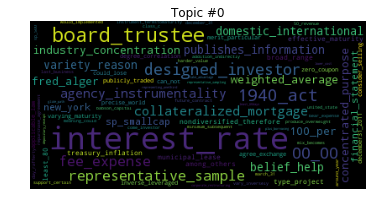

1


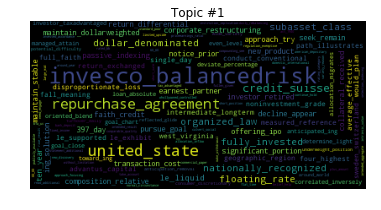

2


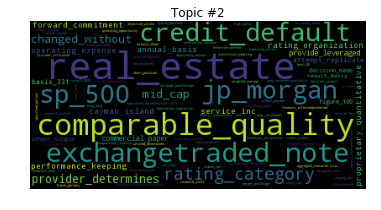

3


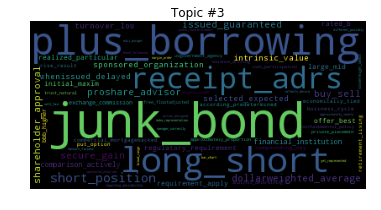

4


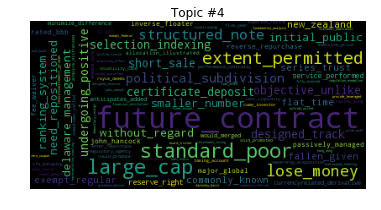

5


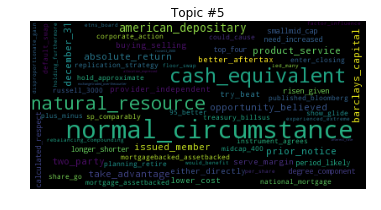

6


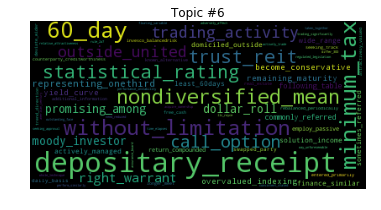

7


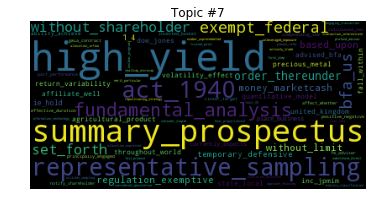

8


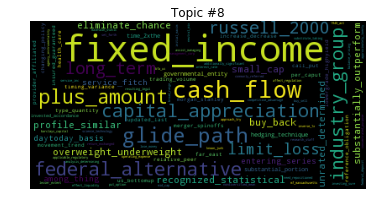

9


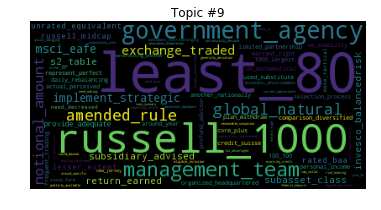

In [77]:
for t in range(lda_model_bigram.num_topics):
    plt.figure()
    print(t)
    plt.imshow(WordCloud().fit_words(dict(lda_model_bigram.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [78]:
### Trigrams
from nltk.tokenize import RegexpTokenizer
from gensim import corpora, models
import gensim
import os
from os import path
from time import sleep
import matplotlib.pyplot as plt
import random
import wordcloud
from wordcloud import WordCloud , STOPWORDS

In [79]:

trigrams2 = gensim.models.phrases.Phrases()


trigrams2.add_vocab(bigram_phraser2[doc_tokens])

trigram_phraser2 = gensim.models.phrases.Phraser(trigrams2)

trigram_list=(list(trigram_phraser2[bigram_phraser2[doc_tokens]]))

#print(bigram_list)

In [ ]:
print(trigram_list)

In [81]:
trigram_list1= [item for sublist in trigram_list for item in sublist]

In [82]:
trigram_list_new = []

for i in range(len(trigram_list1)):
    if (trigram_list1[i].find('_')==-1):
        continue
    else:
        trigram_list_new.append(trigram_list1[i])

In [83]:
vectorizer_trigram = CountVectorizer(analyzer='word',                               
                             stop_words='english',            
                             lowercase=True,                         
                            )

data_vectorized_trigram = vectorizer_trigram.fit_transform(trigram_list_new)

In [84]:
lda_model_trigram = LatentDirichletAllocation(n_topics=20,              
                                      max_iter=1,                           
                                     )
lda_output_trigram = lda_model_trigram.fit_transform(data_vectorized_trigram)

print(lda_model_trigram)

/usr/lib64/python3.4/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/usr/lib64/python3.4/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=1,
             mean_change_tol=0.001, n_components=10, n_jobs=1, n_topics=20,
             perp_tol=0.1, random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)


In [85]:
trigram_list2 = [[i] for i in trigram_list_new]
dictionary_trigram = gensim.corpora.Dictionary(trigram_list2 )

In [86]:
dictionary_trigram.filter_extremes(no_above=0.5,keep_n=100000)
bow_corpus_trigram = [dictionary_trigram.doc2bow(doc) for doc in trigram_list2 ]

In [87]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[]


In [ ]:
lda_model_trigram = gensim.models.LdaMulticore(bow_corpus_trigram, num_topics=10, id2word=dictionary_trigram, passes=2, workers=2)

0


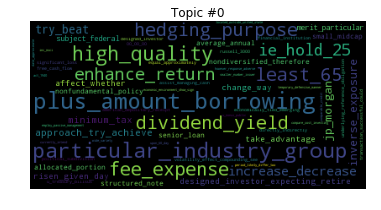

1


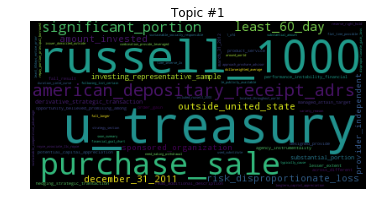

2


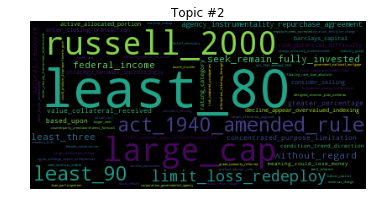

3


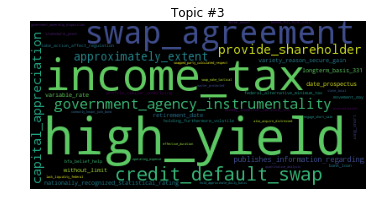

4


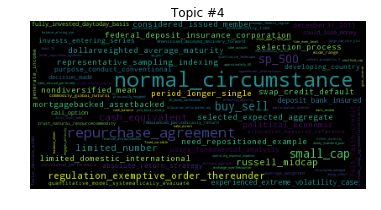

5


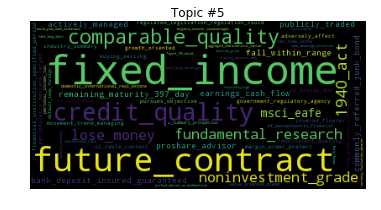

6


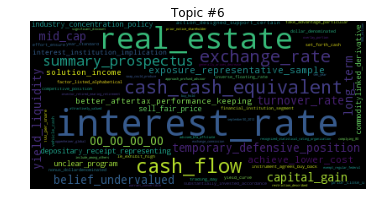

7


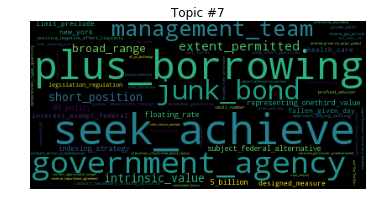

8


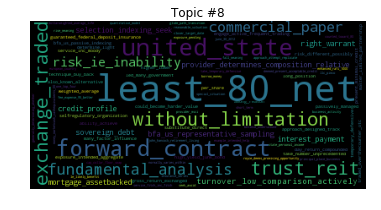

9


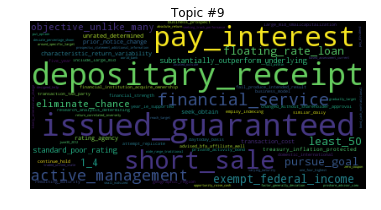

In [89]:
for t in range(lda_model_trigram.num_topics):
    plt.figure()
    print(t)
    plt.imshow(WordCloud().fit_words(dict(lda_model_trigram.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [ ]:
print(trigram_list_new)

In [91]:
vectorizer_trigram = CountVectorizer(analyzer='word',stop_words='english',lowercase=True)

data_vectorized_trigram = vectorizer_trigram.fit_transform(trigram_list_new)

In [94]:
lda_model_trigram = LatentDirichletAllocation(n_topics=20,              
                                      max_iter=1)

lda_output_trigram = lda_model_trigram.fit_transform(data_vectorized_trigram)
print(lda_model_trigram)

/usr/lib64/python3.4/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/usr/lib64/python3.4/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=1,
             mean_change_tol=0.001, n_components=10, n_jobs=1, n_topics=20,
             perp_tol=0.1, random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)


In [ ]:
vocab = vectorizer_trigram.get_feature_names()

n_top_words = 10
k = 2

lda_model_trigram = LatentDirichletAllocation(n_topics=20             )
lda_output_trigram = lda_model_trigram.fit_transform(data_vectorized_trigram)


topic_words = {}

for topic, comp in enumerate(lda_model_trigram.components_):
   
    word_idx = np.argsort(comp)[::-1][:n_top_words]

    # store the words most relevant to the topic
    topic_words[topic] = [vocab[i] for i in word_idx]

In [254]:
for topic, words in topic_words.items():
    print('Topic: %d' % topic)
    print('  %s' % ', '.join(words))

Topic: 0
  maintains_dollarweighted_average, must_eligible, determined_present_minimal, jp_morgan, extent_permitted, regulation_exemptive_order_thereunder, without_limitation, 80_policy, longterm_capital_appreciation, fundamental_analysis
Topic: 1
  exchange_rate, comparable_quality_determined, turnover_rate, least_three, defined_applicable_regulation, lesser_extent, selected_expected_aggregate, bfa_belief_help, capital_gain, small_cap
Topic: 2
  issued_guaranteed, earnest_partner, fred_alger_management, temporary_defensive_position, summary_prospectus, achieve_lower_cost, opportunity_believed_promising_among, publicly_listed, remaining_maturity_397_day, determine_light
Topic: 3
  real_estate, credit_quality, msci_eafe, 1940_act, government_agency, long_short, absolute_return_strategy, decline_appear_overvalued_indexing, fundamental_research, large_mid_smallcapitalization
Topic: 4
  united_state, invesco_balancedrisk_allocation, financial_service, exempt_federal_income, commonly_referr

In [248]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model_trigram, data_vectorized_trigram, vectorizer_trigram,mds='tsne' )
panel

PreparedData(topic_coordinates=           Freq  cluster  topics           x           y
topic                                                   
9      5.358344        1       1   90.739288 -123.394447
10     5.140004        1       2   85.878571  -25.673727
12     5.052009        1       3  151.259094  -18.431530
1      5.051996        1       4  -64.047043   38.497459
19     5.037217        1       5  122.152283  -71.929634
16     5.035768        1       6   -4.912901   23.202320
17     5.026615        1       7   28.872034 -127.080338
3      4.993802        1       8   61.683949   20.163099
0      4.990156        1       9   26.758753  -21.973181
18     4.986559        1      10  -68.432930  -72.386749
2      4.981019        1      11  -32.547581 -123.465149
6      4.979140        1      12   33.188545  118.847755
11     4.975826        1      13  -94.499298  -14.332098
4      4.964736        1      14  119.618629   30.160059
14     4.942671        1      15   31.519892   61.573059
8      4.939068        1      16  -32.534267  -22.431988
13     4.931822        1      17   92.855728   82.797653
15     4.902789        1      18   -1.777002  -69.772194
5      4.873401        1      19  -27.717779   86.279236
7      4.837058        1      20   55.230453  -71.193939, topic_info=     Category        Freq                                         Term  \
term                                                                     
2471  Default  128.000000                                interest_rate   
1915  Default  125.000000                                 fixed_income   
3213  Default   99.000000                          normal_circumstance   
2690  Default   93.000000                                 least_80_net   
3891  Default   72.000000                                  real_estate   
2025  Default   65.000000                              future_contract   
2688  Default   59.000000                                     least_80   
724   Default   50.000000                                board_trustee   
4162  Default   46.000000                                 russell_1000   
3514  Default   38.000000                               plus_borrowing   
1299  Default   45.000000                defined_applicable_regulation   
1203  Default   32.000000                               credit_quality   
4205  Default   31.000000                                 seek_achieve   
1200  Default   29.000000                          credit_default_swap   
3151  Default   29.000000                             natural_resource   
2519  Default   62.000000              invesco_balancedrisk_allocation   
1021  Default   27.000000                           comparable_quality   
4034  Default   27.000000                         repurchase_agreement   
4605  Default   27.000000                               swap_agreement   
862   Default   27.000000                         cash_cash_equivalent   
4892  Default   26.000000                                 united_state   
2215  Default   25.000000                                   high_yield   
3754  Default   25.000000                                purchase_sale   
865   Default   25.000000                                    cash_flow   
2644  Default   24.000000                                    large_cap   
1707  Default   23.000000                                exchange_rate   
3484  Default   23.000000              permitted_applicable_regulation   
1023  Default   22.000000                comparable_quality_determined   
1901  Default   22.000000               first_tiersecurities_generally   
1387  Default   22.000000                 determined_without_exception   
...       ...         ...                                          ...   
2275  Topic20   11.472522                                   ie_hold_25   
4539  Topic20   10.715499                  subject_federal_alternative   
315   Topic20    9.573830  agency_instrumentality_repurchase_agreement   
4809  Topic20    9.326030              